## **1.Introduction:**

***1.1 Definition of the project:***


> With the proliferation of cyber-attacks in recent decades, we have witnessed the evolution of fraudulent activities, hacking, and breaches. On the other hand, we have seen several methods for protection and prevention against these dangers.

> This data contains a set of information about cyber-attacks, and it will be analyzed and studied to infer some symptoms of cyber-attacks


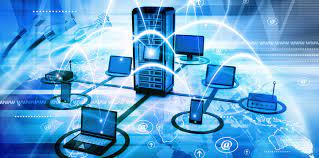



***1.2 Clarification of terms:***

Before we begin the analysis, the data must be clarified and defined, so let's start:

**Event:** It contains information about the operation performed on the traffic. It is represented by the values 1 for s (sending), 2 for r(receiving), 3 for f (forwarding), and 4 for d (dropping).

**Time:** The time of the event performed in the row.

**S_Node:** Source node number.

**Node_id:** The node number of the relevant node.

**Rest_Energy:** The remaining energy of the relevant node.

**Mac_Type_Pck:** MAC type of the packet.

**Source_IP_Port:** Port number of the source node.

**Packet_Size:** Forwarded packet size.

**TTL:** The lifetime of the forwarded traffic in the network.

**Hop_Count:** Number of nodes passed.

**Broadcast_ID:** The ID number of the broadcast packets.

**Dest_Node_Num:** ID of the target node.

**Dest_Seq_Num:** Sequence number of the traffic forwarded to the destination.

**Src_Node_ID:** Source node ID number.

**Src_Seq_Num:** Source sequence number of traffic forwarded to destination.

**behaviour:** if there attack or not.

**Class:** Type of classified network traffic.

***1.3 Cyber Attacks Identifications:***

**1-Flooding:**

**Description**: Sending a packet to all devices on a network segment.

**Impact**: This can lead to network congestion and bandwidth wastage.

**Malicious Intent**: Overloading the network, causing denial of service (DoS) or disrupting normal operations.

**2-Blackhole:**

**Description**: Discarding incoming packets without processing.

**Impact**: Loss of legitimate traffic, potentially disrupting communications.

**Malicious Intent**: Intercepting or blocking specific traffic, causing targeted services to become unavailable or unreachable.

**3-Forwarding:**

**Description**: Determining the next hop for packet delivery.

**Impact**: Essential for efficient packet routing and network connectivity.

**Malicious Intent**: Manipulating forwarding tables to redirect traffic to unauthorized destinations or intercept sensitive information.


# **2. General Understanding of the Data:**

In [ ]:
#Importing libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#uploding data set
df = pd.read_csv("/content/Dataset.csv")

In [ ]:
df.head()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
1,2,0.100963,78,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
2,2,0.100963,76,76,599.979722,5.0,800.0,79.255,1.255,NaN,30,1,1,100.0,0.0,79,4,No attack,normal
3,2,0.100964,75,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
4,2,0.100964,118,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Event           50000 non-null  int64  
 1   Time            48302 non-null  float64
 2   S_Node          50000 non-null  int64  
 3   Node_id         50000 non-null  int64  
 4   Rest_Energy     48290 non-null  float64
 5   Trace_Level     46102 non-null  float64
 6   Mac_Type_Pckt   48222 non-null  float64
 7   Source_IP_Port  50000 non-null  float64
 8   Des_IP_Port     49940 non-null  float64
 9   Packet_Size     49061 non-null  float64
 10  TTL             50000 non-null  int64  
 11  Hop_Count       50000 non-null  int64  
 12  Broadcast_ID    50000 non-null  int64  
 13  Dest_Node_Num   49581 non-null  float64
 14  Dest_Seq_Num    48765 non-null  float64
 15  Src_Node_ID     50000 non-null  int64  
 16  Src_Seq_Num     50000 non-null  int64  
 17  behaviour       50000 non-null 

In [ ]:
df.shape

(50000, 19)

In [ ]:
df.describe()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num
count,50000.000000,48302.000000,50000.000000,50000.000000,48290.000000,46102.0,48222.000000,50000.000000,4.994000e+04,49061.00000,50000.000000,50000.000000,50000.000000,49581.000000,48765.000000,50000.00000,50000.000000
mean,2.231740,45.015145,99.485580,99.485580,590.688208,5.0,799.933640,99.791520,1.255000e+00,57.83119,22.308720,6.549600,3.506500,135.194571,0.892136,111.38958,9.013000
std,0.760479,25.146437,55.183528,55.183528,5.237260,0.0,7.285911,54.276611,4.440937e-16,21.76158,6.776962,2.995042,2.777803,50.169892,2.023672,62.52889,5.555607
min,1.000000,0.100000,0.000000,0.000000,583.697130,5.0,0.000000,0.255000,1.255000e+00,48.00000,0.000000,1.000000,1.000000,36.000000,0.000000,0.00000,4.000000
25%,2.000000,27.150472,54.000000,54.000000,585.424284,5.0,800.000000,55.255000,1.255000e+00,48.00000,21.000000,4.000000,1.000000,100.000000,0.000000,66.00000,4.000000
50%,2.000000,46.741381,99.000000,99.000000,590.438707,5.0,800.000000,99.255000,1.255000e+00,48.00000,24.000000,6.000000,2.000000,130.000000,0.000000,160.00000,6.000000
75%,2.000000,70.652787,145.000000,145.000000,594.171115,5.0,800.000000,144.255000,1.255000e+00,48.00000,26.000000,9.000000,6.000000,178.000000,0.000000,160.00000,14.000000
max,4.000000,73.145837,199.000000,199.000000,600.000000,5.0,800.000000,199.255000,1.255000e+00,106.00000,30.000000,17.000000,9.000000,199.000000,7.000000,160.00000,20.000000


In [ ]:
#We see that Trace_Level is uniform value so we will drop it
df.drop(['Trace_Level'],axis=1,inplace=True)

In [ ]:
# To count the number of NaN values under the entire Dataframe:
print('NaNs: ',df.isna().sum().sum())
print('Duplicates: ',df.duplicated().sum())
#i chose not to drop any of the nulls because they're not many.

NaNs:  7839
Duplicates:  217


***conclusion:***

We have 217 duplicate rows most of the feature could be duplicated **but** the MAC Type is a uniqe value that could not have the same number in two rows found 217 duplicate rows, where most features could be duplicated. However, the MAC Type is a unique value that cannot be duplicated in two rows.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

#*2.1 Finding the relation between feature:*

In [ ]:
df['Event'].value_counts()


2    39776
4     7198
1     2809
Name: Event, dtype: int64

2809 values for sending(1)

39776 values for receiving(2)

7198 values for dropping(4)



In [ ]:
df['Packet_Size'].value_counts()

48.0     40535
106.0     8316
Name: Packet_Size, dtype: int64

In [ ]:
df['Broadcast_ID'].value_counts().sort_values()

5      950
7     3516
4     3525
6     3546
3     3576
9     3614
8     3667
2     9853
1    17536
Name: Broadcast_ID, dtype: int64

Broadcast ID (broadcast address) is a special address used to transmit data to all devices on a network segment, broadcasting is commonly used for tasks like service discovery, such as when a device wants to announce its presence to other devices on the network, or for protocols like ARP (Address Resolution Protocol) which is used to map IP addresses to MAC addresses within a local network.

In [ ]:
df['behaviour'].value_counts()

No attack       40836
Under attack     8947
Name: behaviour, dtype: int64

In [ ]:
df['Type'].value_counts()
#four type of attacks and the most counts is normal

normal        40836
Flooding       5827
Blackhole      1886
Forwarding     1234
Name: Type, dtype: int64

In [ ]:
df.nunique()

Event                 3
Time              37292
S_Node              200
Node_id             200
Rest_Energy       35317
Mac_Type_Pckt         2
Source_IP_Port      200
Des_IP_Port           1
Packet_Size           2
TTL                  26
Hop_Count            17
Broadcast_ID          9
Dest_Node_Num        11
Dest_Seq_Num          4
Src_Node_ID           5
Src_Seq_Num           9
behaviour             2
Type                  4
dtype: int64

Let us have deeper understanding of every feature and the relation between them:

In [ ]:
df.groupby(["Event",'behaviour'])[["Type"]].count()

Type
Event behaviour          
1     No attack      2372
      Under attack    437
2     No attack     32689
      Under attack   7087
4     No attack      5775
      Under attack   1423

In [ ]:
byEvent1 = df.groupby(by=["Event"]).count()
byEvent1.head(12)

,Time,S_Node,Node_id,Rest_Energy,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
Event,,,,,,,,,,,,,,,,,
1,2712,2809,2809,2717,2735,2809,2805,2750,2809,2809,2809,2783,2756,2809,2809,2809,2809
2,38643,39776,39776,38493,38407,39776,39726,39089,39776,39776,39776,39432,38770,39776,39776,39776,39776
4,6947,7198,7198,6921,6863,7198,7192,7012,7198,7198,7198,7149,7022,7198,7198,7198,7198


In [ ]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Event,Time,S_Node,Node_id,Rest_Energy,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num
Event,1.000000,-0.025164,-0.003812,-0.003812,0.025187,0.014777,-0.004166,NaN,0.765511,-0.006002,0.006363,-0.019751,-0.017451,0.003866,-0.025587,-0.019751
Time,-0.025164,1.000000,-0.031420,-0.031420,-0.998660,0.001244,-0.034536,NaN,-0.020061,0.096785,-0.071284,0.633117,-0.013041,-0.208239,0.247709,0.633117
S_Node,-0.003812,-0.031420,1.000000,1.000000,0.052805,0.003138,0.868005,NaN,-0.002723,-0.010813,0.057587,-0.004517,0.002563,-0.001849,0.020662,-0.004517
Node_id,-0.003812,-0.031420,1.000000,1.000000,0.052805,0.003138,0.868005,NaN,-0.002723,-0.010813,0.057587,-0.004517,0.002563,-0.001849,0.020662,-0.004517
Rest_Energy,0.025187,-0.998660,0.052805,0.052805,1.000000,-0.001372,0.052889,NaN,0.020487,-0.098503,0.088144,-0.631559,0.009676,0.201990,-0.248863,-0.631559
Mac_Type_Pckt,0.014777,0.001244,0.003138,0.003138,-0.001372,1.000000,0.003194,NaN,0.004143,-0.010226,0.016735,0.002552,0.007883,-0.002605,0.004534,0.002552
Source_IP_Port,-0.004166,-0.034536,0.868005,0.868005,0.052889,0.003194,1.000000,NaN,-0.002521,-0.010517,0.051017,-0.005635,0.000868,0.000011,0.020721,-0.005635
Des_IP_Port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet_Size,0.765511,-0.020061,-0.002723,-0.002723,0.020487,0.004143,-0.002521,NaN,1.000000,0.001235,0.008789,-0.016544,-0.017728,-0.000149,-0.024071,-0.016544
TTL,-0.006002,0.096785,-0.010813,-0.010813,-0.098503,-0.010226,-0.010517,NaN,0.001235,1.000000,-0.212736,0.031533,-0.001058,-0.532907,0.085178,0.031533


In [ ]:
df.columns

Index(['Event', 'Time', 'S_Node', 'Node_id', 'Rest_Energy', 'Mac_Type_Pckt',
       'Source_IP_Port', 'Des_IP_Port', 'Packet_Size', 'TTL', 'Hop_Count',
       'Broadcast_ID', 'Dest_Node_Num', 'Dest_Seq_Num', 'Src_Node_ID',
       'Src_Seq_Num', 'behaviour', 'Type'],
      dtype='object')

# ***3.Numerical Data Analysis:***

In [ ]:
df_num=df[['Event','Time','Rest_Energy','Packet_Size','TTL','Hop_Count','Broadcast_ID']]
df_num.head()

,Event,Time,Rest_Energy,Packet_Size,TTL,Hop_Count,Broadcast_ID
0,1,0.100000,600.000000,48.0,30,1,1
1,2,0.100963,599.979723,48.0,30,1,1
2,2,0.100963,599.979722,NaN,30,1,1
3,2,0.100964,599.979722,48.0,30,1,1
4,2,0.100964,599.979722,48.0,30,1,1


***Note:***

We could not took the [S_Node,Node_id,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num]

becuse they are fixed number we can consider them like name ,phone number....


In [ ]:
df.groupby(['Event'])[['behaviour']].value_counts()

Event  behaviour   
1      No attack        2372
       Under attack      437
2      No attack       32689
       Under attack     7087
4      No attack        5775
       Under attack     1423
dtype: int64

In [ ]:
df.groupby(['behaviour'])[['TTL','Hop_Count','Packet_Size','Rest_Energy','Time']].mean()

,TTL,Hop_Count,Packet_Size,Rest_Energy,Time
behaviour,,,,,
No attack,21.760359,6.795817,57.745474,591.495926,41.124658
Under attack,24.811333,5.397116,58.450863,586.974458,62.766753


***Conclusion:***



1.   TTL is higher in Under attack situation
2.   Hop_count is higher in no attack but with small differences.
1.   Packet Size and Rest Energy are in the same range in both situations.
2.   Time have a big different ranges and higher in under attack ,we have to know why ?





In [ ]:
df.groupby(['Type'])[['TTL','Hop_Count','Packet_Size','Rest_Energy','Time']].mean()

,TTL,Hop_Count,Packet_Size,Rest_Energy,Time
Type,,,,,
Blackhole,21.793213,7.340933,59.600000,591.246200,42.594995
Flooding,26.084435,4.915565,58.629163,584.980905,72.562941
Forwarding,23.412480,4.700162,55.872445,589.828557,47.003688
normal,21.760359,6.795817,57.745474,591.495926,41.124658


***Conclusion:***

As we noticed that the Time has big jump in the range between attack and under attack, here we can conclude the answer that Flooding attacks can vary in duration, ranging from short-lived bursts lasting minutes to hours to prolonged assaults spanning days or longer. Longer attacks typically result in greater damage to the targeted system or network.

# *3.1 Numerical analysis (Analytical graphics):*

<ipython-input-35-34456c19ba30>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x='Event',hue='behaviour',data =df,color='green')


<Axes: xlabel='Event', ylabel='count'>

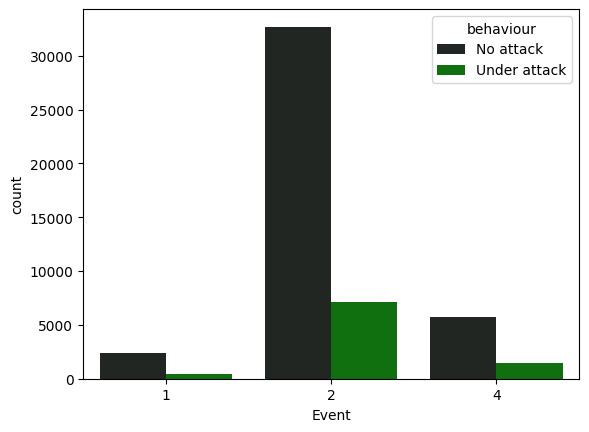

In [ ]:
sns.countplot(x='Event',hue='behaviour',data =df,color='green')

***Conclusion:***

Event (2) which is "receiving" has the most under attack count.

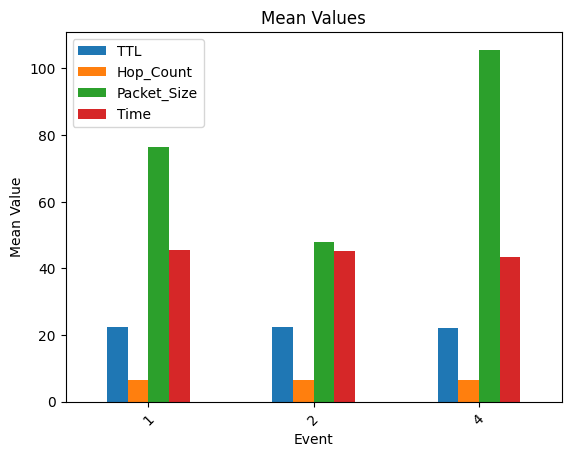

In [ ]:
grouped_data = df_num.groupby(["Event"])[['TTL','Hop_Count','Packet_Size','Time']].mean()

# Plotting
grouped_data.plot(kind='bar')
plt.title('Mean Values')
plt.xlabel('Event')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

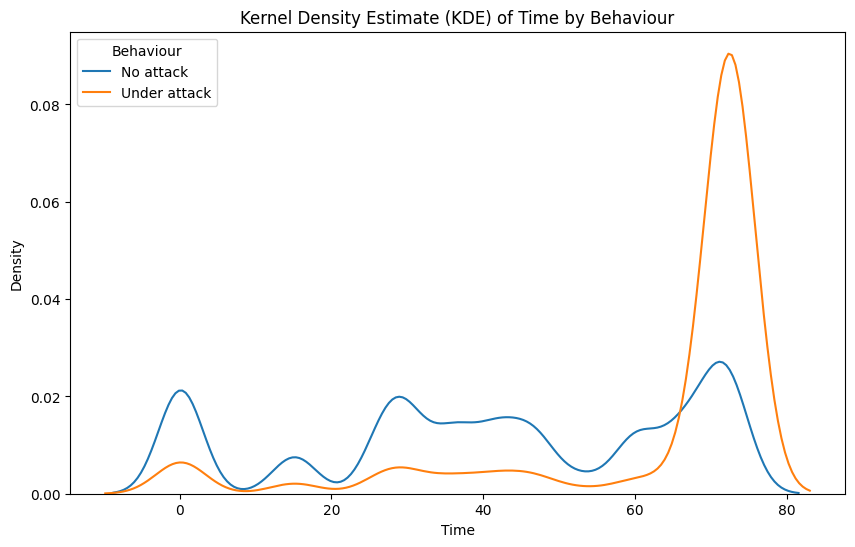

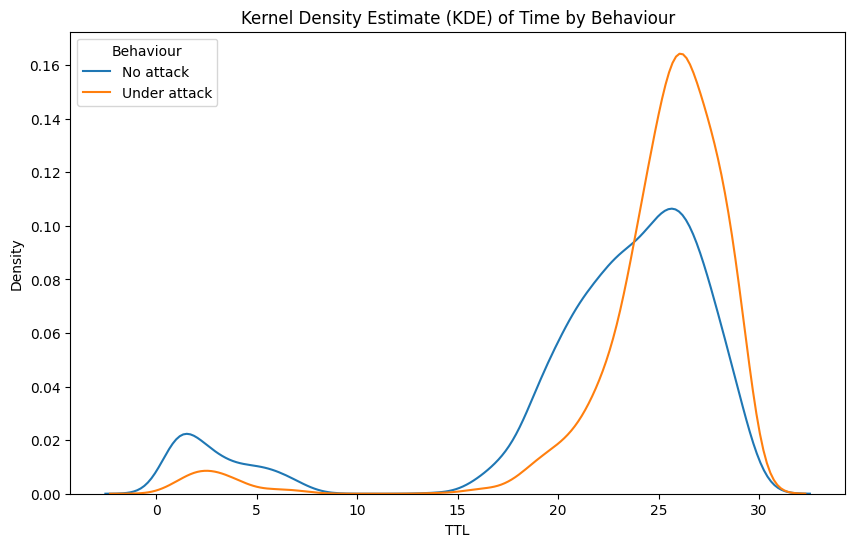

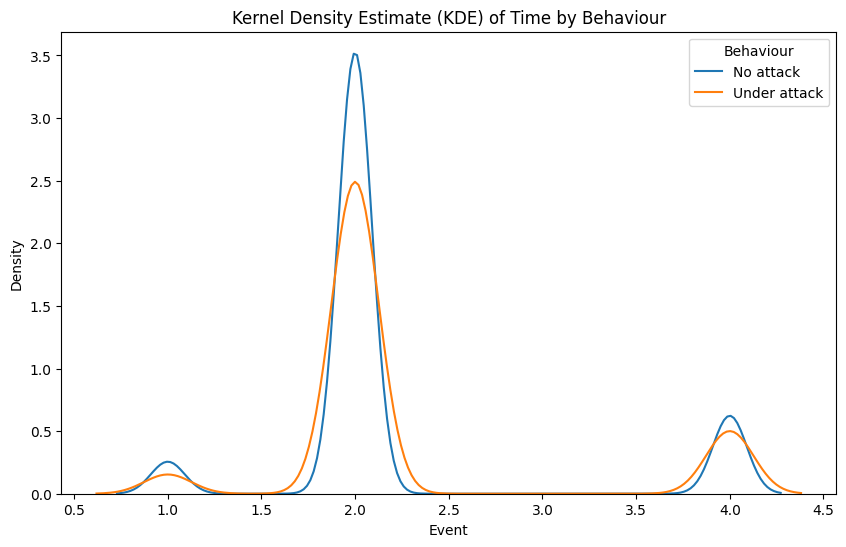

In [ ]:
plt.figure(figsize=(10, 6))
for category in df['behaviour'].unique():
    sns.kdeplot(df[df['behaviour'] == category]['Time'], label=category)

plt.title('Kernel Density Estimate (KDE) of Time by Behaviour')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(title='Behaviour')
plt.show()


plt.figure(figsize=(10, 6))
for category in df['behaviour'].unique():
    sns.kdeplot(df[df['behaviour'] == category]['TTL'], label=category)

plt.title('Kernel Density Estimate (KDE) of Time by Behaviour')
plt.xlabel('TTL')
plt.ylabel('Density')
plt.legend(title='Behaviour')
plt.show()


plt.figure(figsize=(10, 6))
for category in df['behaviour'].unique():
    sns.kdeplot(df[df['behaviour'] == category]['Event'], label=category)

plt.title('Kernel Density Estimate (KDE) of Time by Behaviour')
plt.xlabel('Event')
plt.ylabel('Density')
plt.legend(title='Behaviour')
plt.show()

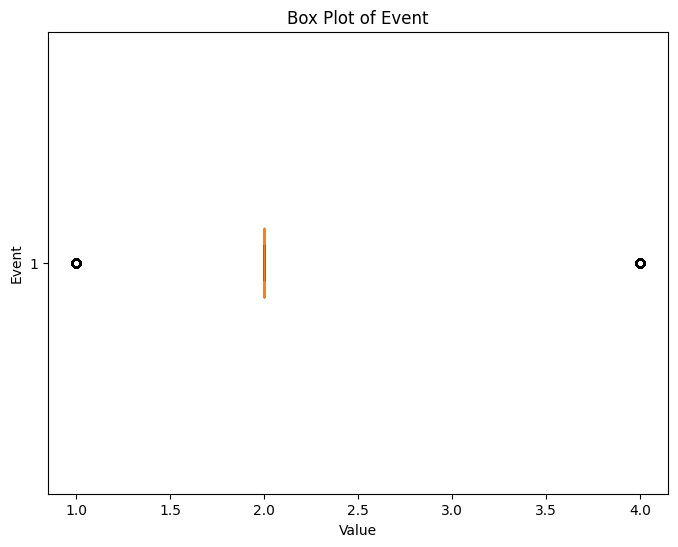

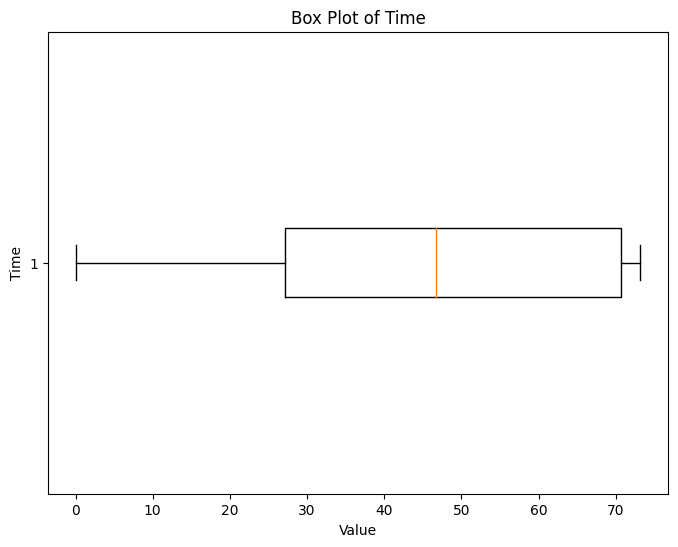

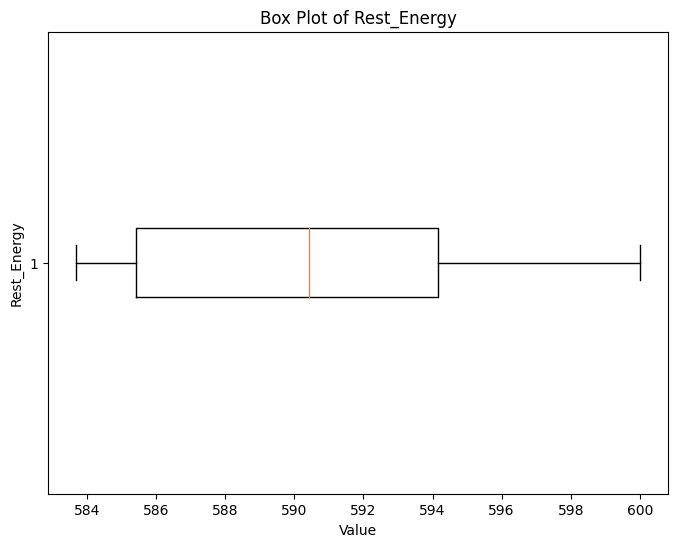

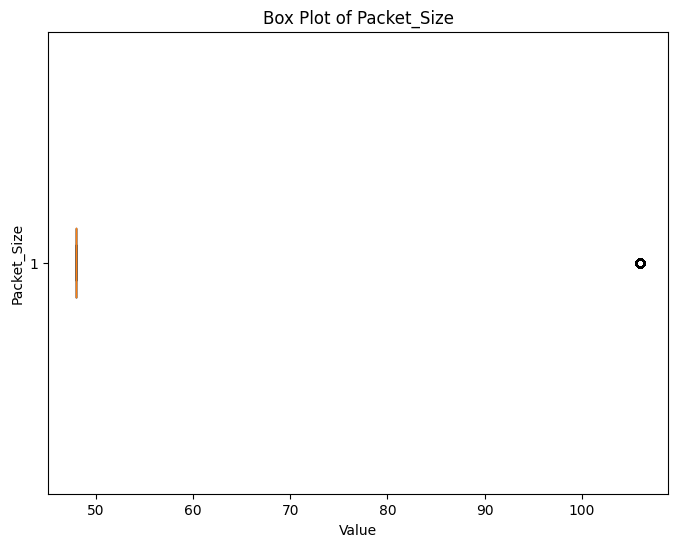

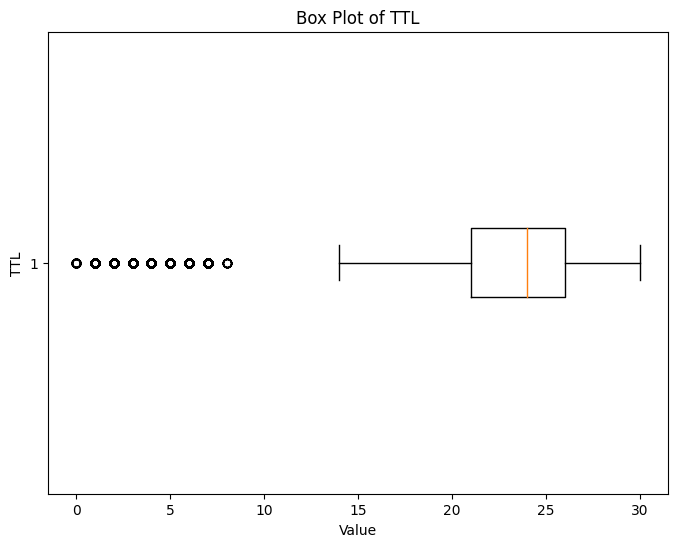

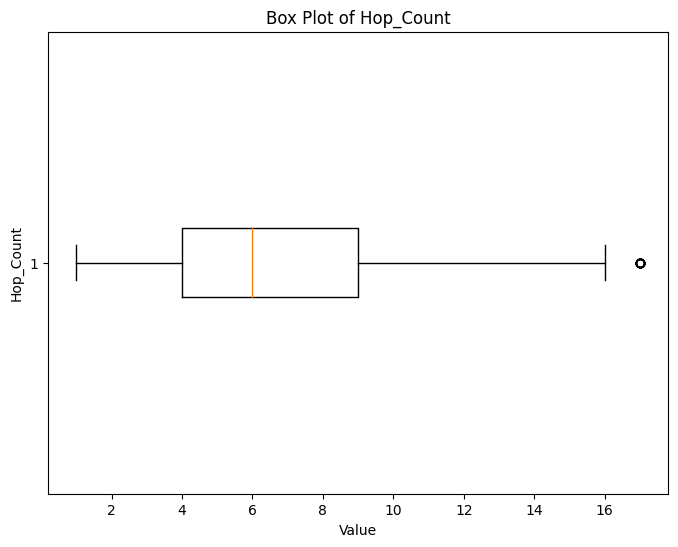

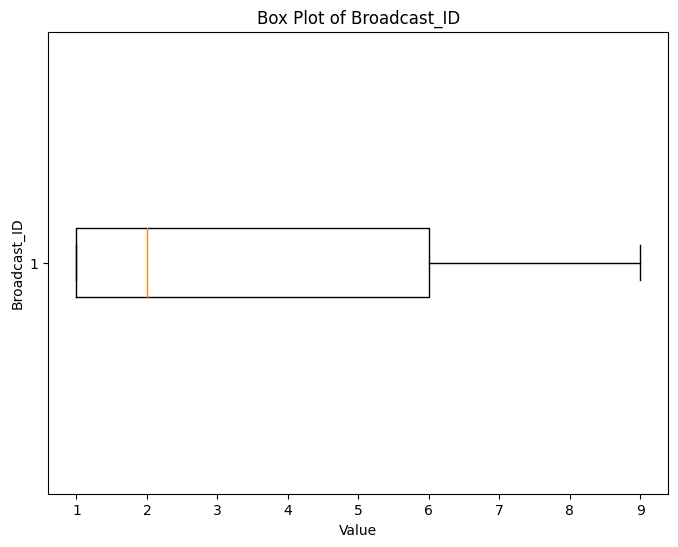

In [ ]:
for column in df_num.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_num[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.ylabel(column)
    plt.show()

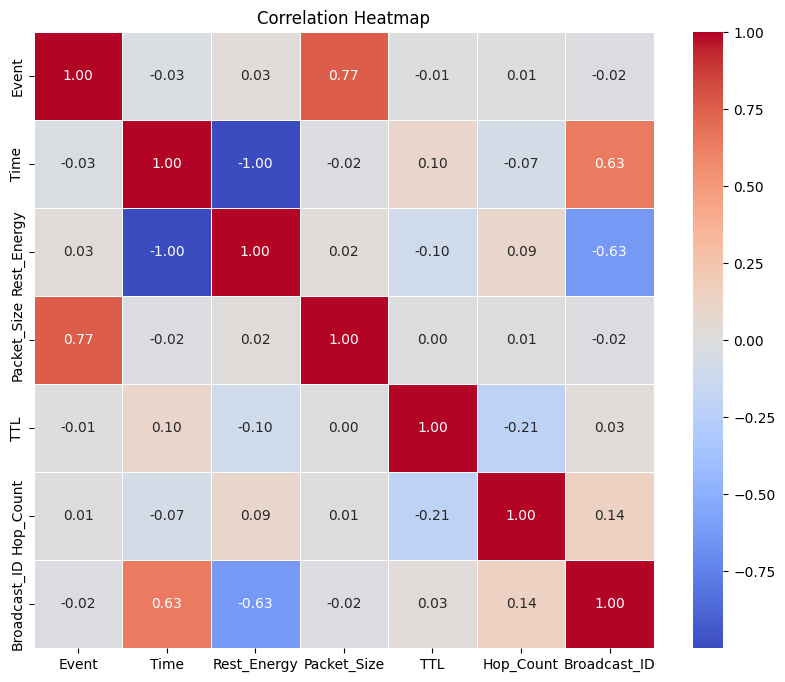

In [ ]:
correlation_matrix = df_num.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

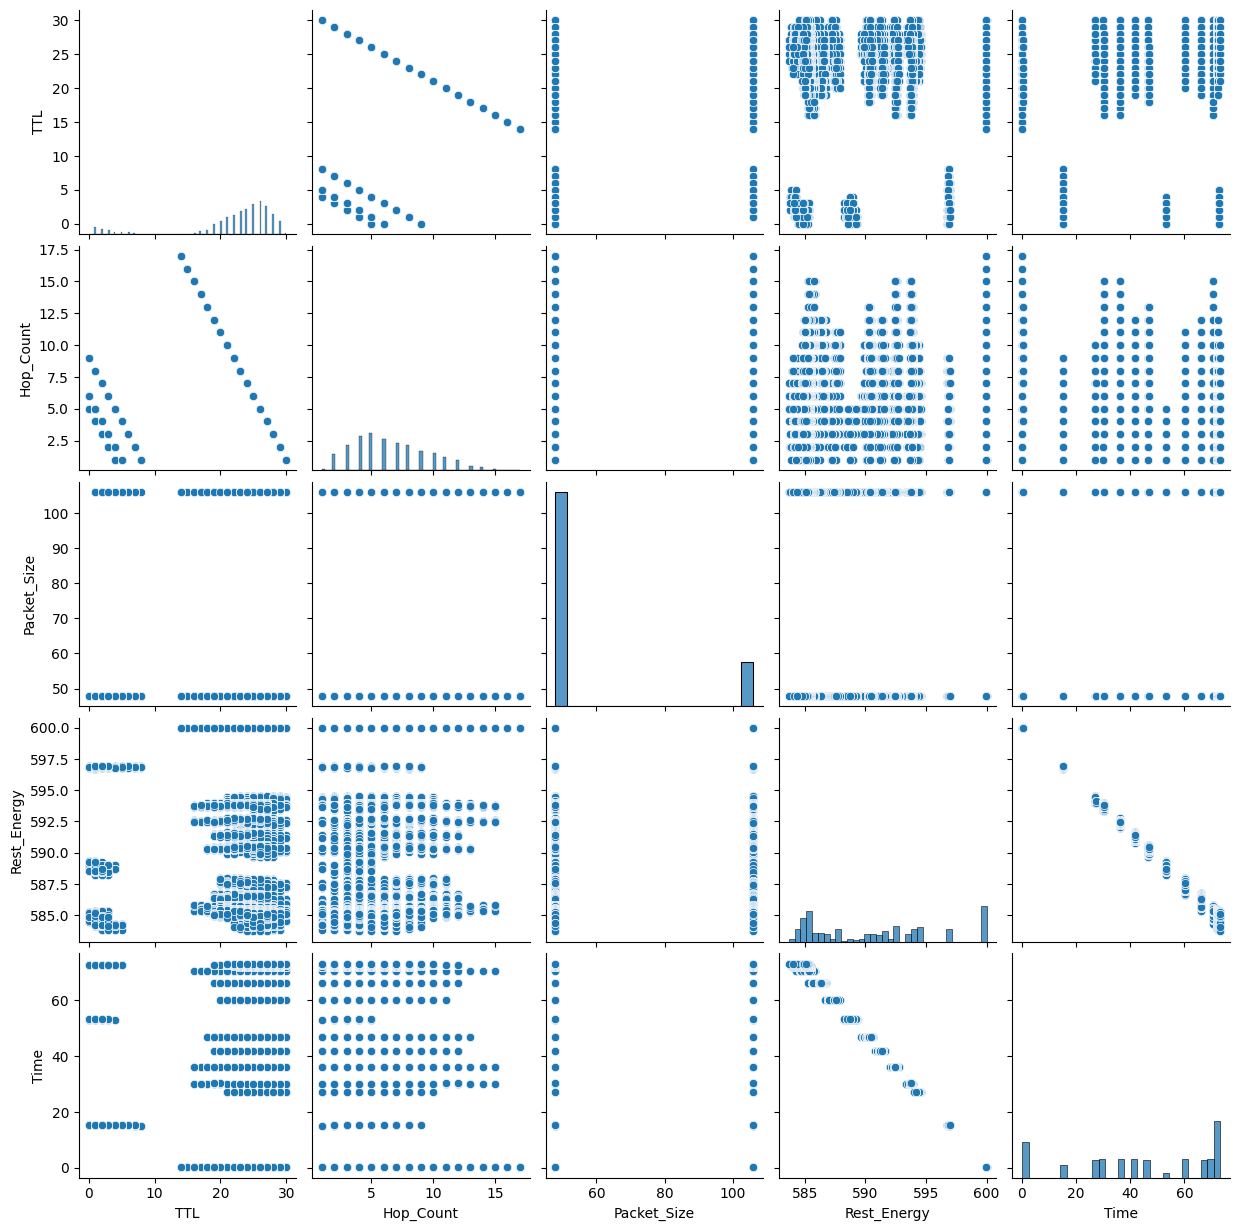

In [ ]:
selected_features = ['TTL', 'Hop_Count', 'Packet_Size', 'Rest_Energy', 'Time']
df_selected = df_num[selected_features]

# Plotting pairplot
sns.pairplot(df_selected)
plt.show()

# **4.Categorical Data Analysis:**

In [ ]:
df_cat=df[['behaviour','Type','S_Node','Node_id','Mac_Type_Pckt','Source_IP_Port','Des_IP_Port','Dest_Node_Num','Dest_Seq_Num','Src_Node_ID','Src_Seq_Num']]
df_cat.head()

,behaviour,Type,S_Node,Node_id,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num
0,No attack,normal,79,79,0.0,79.255,1.255,100.0,0.0,79,4
1,No attack,normal,78,78,800.0,79.255,1.255,100.0,0.0,79,4
2,No attack,normal,76,76,800.0,79.255,1.255,100.0,0.0,79,4
3,No attack,normal,75,75,800.0,79.255,1.255,100.0,0.0,79,4
4,No attack,normal,118,118,800.0,79.255,1.255,100.0,0.0,79,4


In [ ]:
df_cat.nunique()

behaviour           2
Type                4
S_Node            200
Node_id           200
Mac_Type_Pckt       2
Source_IP_Port    200
Des_IP_Port         1
Dest_Node_Num      11
Dest_Seq_Num        4
Src_Node_ID         5
Src_Seq_Num         9
dtype: int64

In [ ]:
under_attack_df = df[df['behaviour'] == 'Under attack']

# Group by 'S_Node' and count occurrences, then get the top 5 most repeated
top_5_nodes = under_attack_df['S_Node'].value_counts().nlargest(5)

print("Top 5 most repeated S_Node when behaviour is 'Under attack':")
print(top_5_nodes)



Top 5 most repeated S_Node when behaviour is 'Under attack':
43     290
74     284
62     282
140    278
84     277
Name: S_Node, dtype: int64


In [ ]:
under_attack_df = df[df['behaviour'] == 'Under attack']

# Group by 'S_Node' and count occurrences, then get the top 5 most repeated
top_5_nodes = under_attack_df['Source_IP_Port'].value_counts().nlargest(5)

print("Top 5 most repeated Source_IP_Port when behaviour is 'Under attack':")
print(top_5_nodes)



Top 5 most repeated Source_IP_Port when behaviour is 'Under attack':
82.255     97
86.255     96
102.255    94
122.255    89
43.255     89
Name: Source_IP_Port, dtype: int64


In [ ]:
under_attack_df = df[df['behaviour'] == 'Under attack']

# Group by 'S_Node' and count occurrences, then get the top 5 most repeated
top_5_nodes = under_attack_df['Dest_Node_Num'].value_counts().nlargest(5)

print("Top 5 most repeated Dest_Node_Num when behaviour is 'Under attack':")
print(top_5_nodes)



Top 5 most repeated Dest_Node_Num when behaviour is 'Under attack':
36.0     3567
37.0     2599
100.0     610
130.0     455
121.0     333
Name: Dest_Node_Num, dtype: int64


***Conclusion:***




1.   S_Node=43
2.   Source_IP_Port=82.255
1.   Dest_Node_Num=36.0

Based on this data, we have identified the source and target of the attacks, allowing us to track the attackers.

# *4.1Categorical analysis (Analytical graphics):*

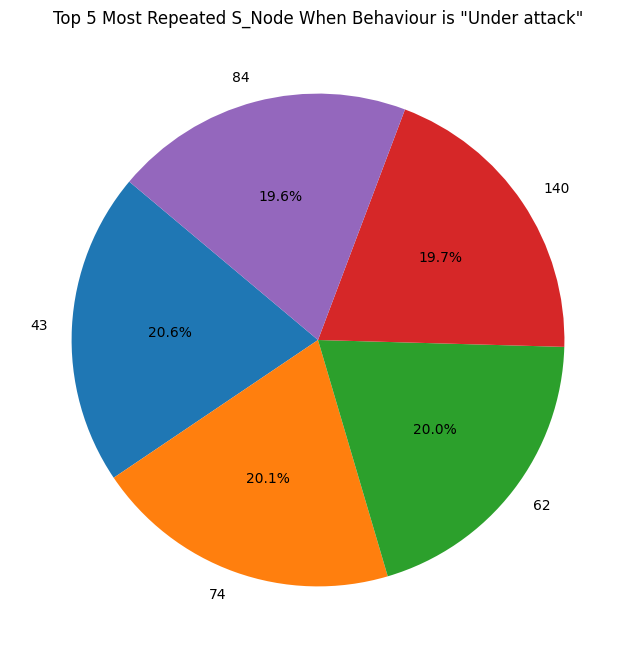

In [ ]:
under_attack_df = df[df['behaviour'] == 'Under attack']

# Group by 'S_Node' and count occurrences, then get the top 5 most repeated
top_5_nodes = under_attack_df['S_Node'].value_counts().nlargest(5)


plt.figure(figsize=(8, 8))
top_5_nodes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Repeated S_Node When Behaviour is "Under attack"')
plt.ylabel('')
plt.show()

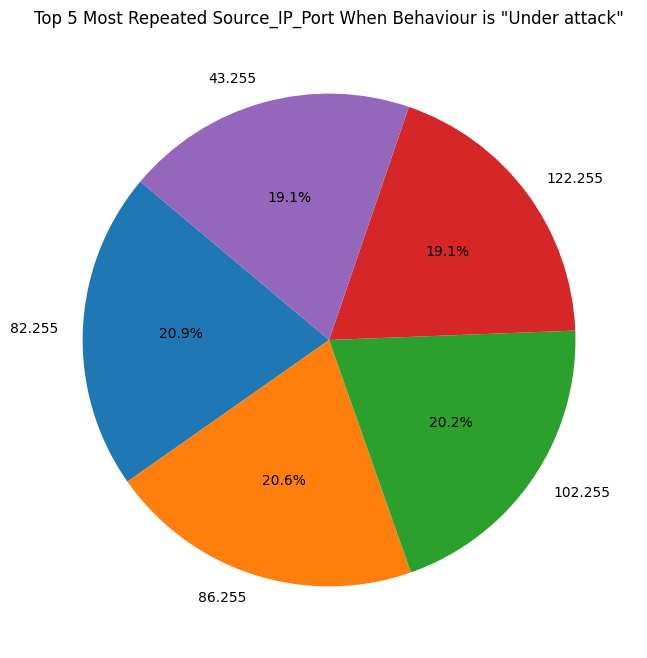

In [ ]:
under_attack_df = df[df['behaviour'] == 'Under attack']

# Group by 'S_Node' and count occurrences, then get the top 5 most repeated
top_5_nodes = under_attack_df['Source_IP_Port'].value_counts().nlargest(5)



plt.figure(figsize=(8, 8))
top_5_nodes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Repeated Source_IP_Port When Behaviour is "Under attack"')
plt.ylabel('')
plt.show()

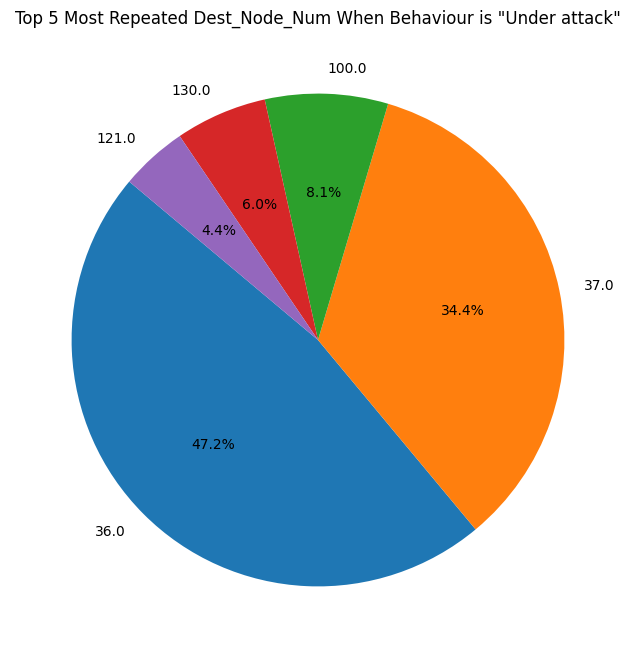

In [ ]:
under_attack_df = df[df['behaviour'] == 'Under attack']

# Group by 'S_Node' and count occurrences, then get the top 5 most repeated
top_5_nodes = under_attack_df['Dest_Node_Num'].value_counts().nlargest(5)


plt.figure(figsize=(8, 8))
top_5_nodes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Repeated Dest_Node_Num When Behaviour is "Under attack"')
plt.ylabel('')
plt.show()

# ***Final Report:***





 By analyzing the numerical data we conclude that :

 First The attack reaches the highest level on **Event 2** which is receiving.

Seocnd the  **flooding** attack depend on the time to be higher than normal, the **blackhole** Secondattack depends on Hop counts to be highe and the **forwarding** attack depend on hop counts to be low.

Thirdly, through this analysis, we can anticipate and prevent cyber attacks by identifying the symptoms that have been associated with them before they occur, Additionally, we can accurately and quickly determine the type of problem through this analysis.

By analyzing the categorical  data we conclude that :

After analyzing the categorical data, we have concluded that identifying the source of attacks would be beneficial in tracking and blocking packets originating from the same IP or port source. This approach will help to improve the network's security and make it more secure.
